# 국가 별 음주 데이터 분석하기

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "../data/drinks.csv"
drinks = pd.read_csv(file_path) # read_csv함수로 데이터를 데이터 프레임 형태로 불러옴
print(drinks.info())
drinks.head(10) # head() 는 괄호 내에 아무것도 기입하지 않을 경우 5개의 값을 반환함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 단순 상관 분석 방법: 피처가 2개일 때의 상관 계수를 계산
### 다중 상관 분석: 피처가 여러 개일 때 상호 간의 연관성을 분석
## 상관 분석: 상관계수가 1에 가깝다면 강한 양의 상관관계가 있는 것이고, -1에 가깝다면 음의 상관관계가 있는 것

In [3]:
# beer_servings, wine_servings 두 피쳐 간의 상관 계수를 계산합니다
# pearson은 상관 계수를 구하는 계산 방법 중 하나이며, 가장 널리 쓰이는 방법
corr = drinks[["beer_servings", "wine_servings"]].corr(method = "pearson") # 데이터 프레임에서 선택할 피쳐가 2개 이상일 경우 대괄호가 하나 더 필요함
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [4]:
# 여러 피쳐 간의 상관 계수 행렬을 구합니다
cols = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[cols].corr(method = "pearson")
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


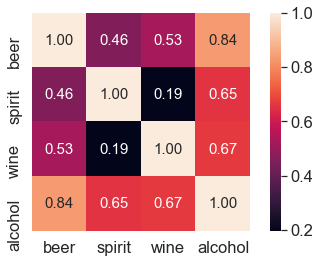

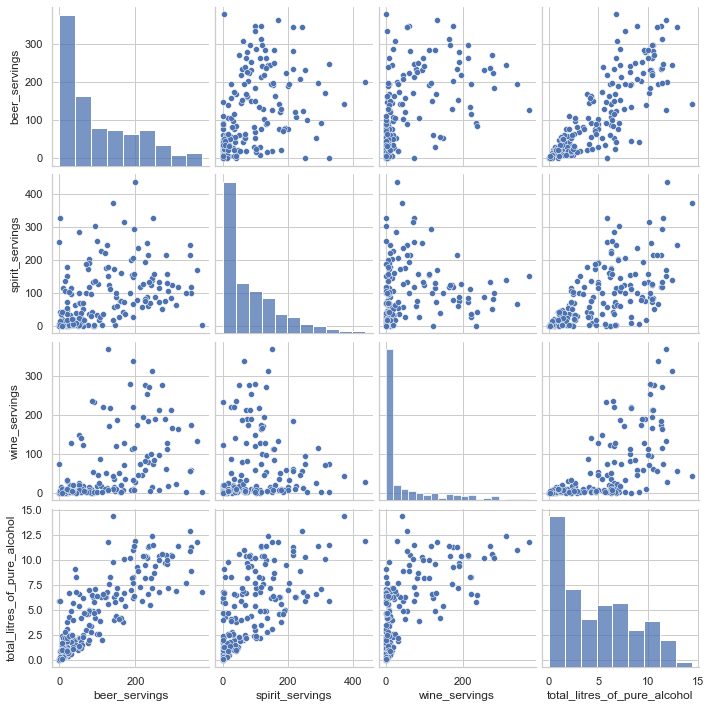

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화합니다
cols_view = ["beer", "spirit", "wine", "alcohol"] # 그래프 출력을 위해 cols 이름을 축약
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
        cbar = True,
        annot = True,
        square = True,
        fmt = ".2f",
        annot_kws = {"size": 15},
        yticklabels = cols_view,
        xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피쳐 간의 산점도 그래프를 출력
sns.set(style = "whitegrid", context = "notebook")
sns.pairplot(drinks[cols], height = 2.5)
plt.show()

In [7]:
# 결측 데이터 전처리하기: 기타 대륙으로 통합 -> "OT"
drinks["continent"] = drinks["continent"].fillna("OT") #fillna()는 결측값을 괄호 안의 값으로 채워줌
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


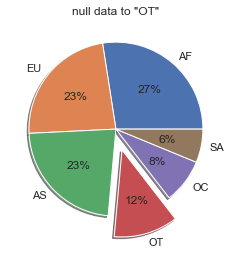

In [8]:
# 파이차트로 시각화하기
labels = drinks["continent"].value_counts().index.tolist()
fracs1 = drinks["continent"].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct="%.0f%%", shadow=True)
plt.title("null data to \"OT\"")
plt.show()

### `[미니 퀴즈 - 1.2]`
- `위의 예제 코드에서 두 개의 코드 라인이 있습니다. 두 라인은 각각 어떤 값들을 담고 있을까요?` 
    - drinks\['continent'\].value_counts().index.tolist()
    - drinks\['continent'\].value_counts().values.tolist()
- `plt의 pie 함수는 위의 두 코드라인의 결과값을 사용합니다. fracs1과 labels는 어떤 의미를 가지는 파라미터일까요?`
    - 직접 pie 함수를 실행하여 파라미터의 의미를 파악해 봅시다
    - explode를 이용하여 OT 조각을 분리하는 방법에 대해서도 테스트해봅시다.

In [9]:
drinks["continent"].value_counts().index.tolist() # 해당 값을 중복하지 않고 반환

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [10]:
drinks["continent"].value_counts().values.tolist() # 해당 값이 각각 몇개씩 존재하는지 반환함

[53, 45, 44, 23, 16, 12]

In [11]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다
result = drinks.groupby("continent").spirit_servings.agg(["mean", "min", "max", "sum"])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [12]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [14]:
# 평균 beer_servings가 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby("continent").beer_servings.mean().idxmax()
print(beer_continent)

EU


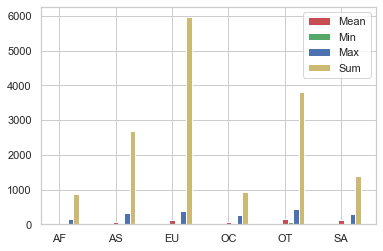

In [15]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
sums = result["sum"].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color="r", label="Mean")
rects2 = plt.bar(index + bar_width, mins, bar_width, color="g", label="Min")
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color="b", label="Max")
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color="y", label="Sum") # 첫번째 변수인 index를 통해서 그래프 간의 간격이나 위치를 조정할 수 있음

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

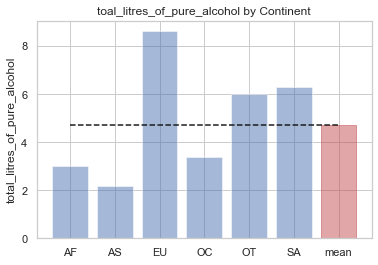

In [16]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append("mean")
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align="center", alpha=0.5)
bar_list[len(continents)-1].set_color("r")
plt.plot([0, 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel("total_litres_of_pure_alcohol")
plt.title("toal_litres_of_pure_alcohol by Continent")

plt.show()

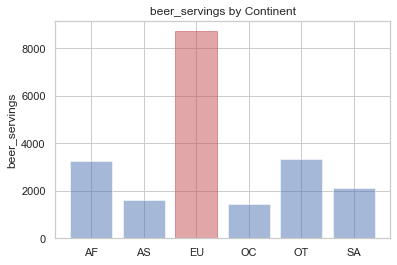

In [17]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

### `[미니 퀴즈 - 1.3]`
- `위의 예제 코드에서 네 개의 코드 라인이 있습니다. 네 라인은 각각 어떤 값들을 담고 있을까요?` 
    - means = result['mean'].tolist()
    - mins = result['min'].tolist()
    - maxs = result['max'].tolist()
    - sums = result['sum'].tolist()
- `위의 예제코드에서 matplotlib의 각종 디자인 기능을 찾아봅시다`
    - 첫 번째 그래프에서 4개의 통계 종류를 나타내는 디자인 기능이 담긴 코드가 어떤 코드인지 찾아보고 실행해 보세요.
    - 두 번째와 세 번째 그래프에서, 하나의 막대만 다르게 색상을 변경하는 코드가 어떤 코드인지 찾아보세요. 그리고 막대를 녹색으로 바꿔보세요.
    - 두 번재 그래프에서 점선을 표현하는 부분의 코드를 찾아보세요. 그리고 점선의 위치도 변경해 봅니다.

In [18]:
means = result['mean'].tolist()
print(means)
mins = result['min'].tolist()
print(mins)
maxs = result['max'].tolist()
print(maxs)
sums = result['sum'].tolist()
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


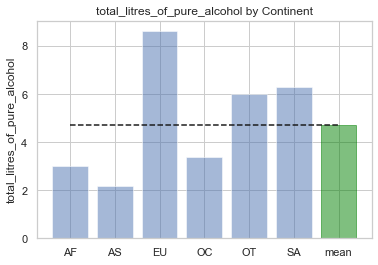

In [19]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

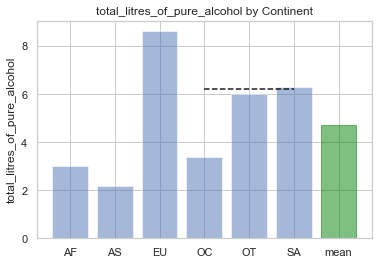

In [20]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

### t-test
t-test란 두 집단 간 평균의 차이에 대한 검정 방법으로, 모집단의 평균 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법

In [21]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


In [22]:
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


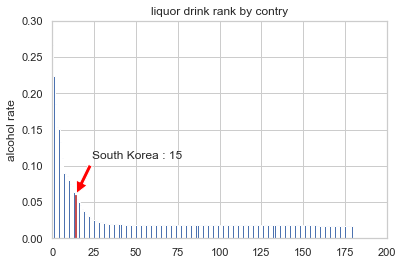

In [23]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()